In [1]:
import pandas as pd
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
cp = pd.read_csv('Taco Bell/customer_profiles.csv')
ad = pd.read_csv('Taco Bell/ad_details.csv')
ae = pd.read_csv('Taco Bell/ad_events.csv')

In [3]:
cp['gender'] = cp['gender'].replace({'M': 0, 'F': 1, 'O': 2})
cp = cp.drop('id', axis=1)
cp['ever_married'] = cp['ever_married'].replace({'Yes': 1, 'No': 0})
cp = cp.drop('home_state', axis=1)
cp = cp.drop('became_member_on (year month day)', axis=1)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(cp)
df = pd.DataFrame(scaled_array)

from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size=0.33, random_state=42)

In [4]:
bics = []
for i in range(2,20):
    gmo = GaussianMixture(n_components=i)
    gm = gmo.fit(df_train)
    bic = gm.bic(df_test)
    bics.append(bic)

In [5]:
print(bics)

[3496.177428874424, 3674.568580481198, -35371.11787595774, -43117.812672008426, -35158.026806195114, -61552.16191554509, -60077.35568474767, -66204.59814211803, -70255.12576593367, -61472.557486731916, -75260.83678722002, -65606.50005011185, -73915.8249272485, -68253.75744398277, -83350.71324404511, -69274.3672466747, -69142.37726473557, -73191.36567250873]


In [6]:
frame = pd.DataFrame({'Clusters': range(2, 20), "BIC": bics})
frame.head()

,Clusters,BIC
0,2,3496.177429
1,3,3674.568580
2,4,-35371.117876
3,5,-43117.812672
4,6,-35158.026806


<AxesSubplot:xlabel='Clusters', ylabel='BIC'>

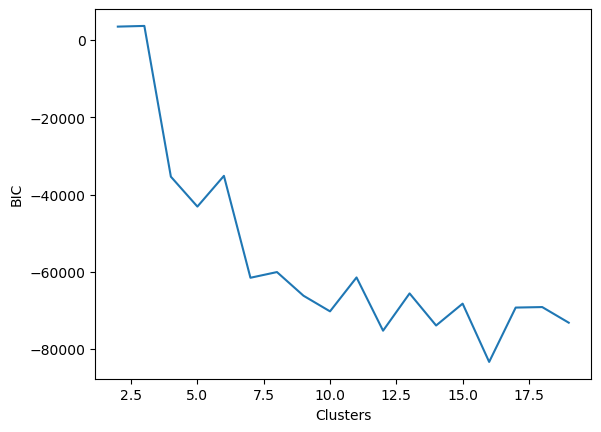

In [7]:
sns.lineplot(data=frame, x="Clusters", y="BIC")

In [8]:
min_bic_value = frame['BIC'].idxmin()
print(min_bic_value)

14


In [9]:
gm = GaussianMixture(n_components=3, random_state=0).fit(df_train)

In [10]:
gm.means_

array([[ 1.06355702e+00,  1.82426481e-01,  2.63181275e-01,
        -8.06809926e-04,  2.46641340e-02],
       [-8.42539791e-01, -1.36116100e-01, -2.04966230e-01,
        -3.49504163e-03, -2.29386197e-02],
       [ 2.96965383e+00, -1.03985075e-02, -1.35983184e-01,
         5.78173320e-02, -1.93111366e-03]])

In [11]:
predictions = gm.predict(df_test)

In [12]:
unscaled_array = scaler.inverse_transform(df_test)

In [13]:
df = pd.DataFrame(unscaled_array)

In [14]:
df.insert(5, "Predict", predictions, True)

In [15]:
df.head()

,0,1,2,3,4,Predict
0,1.0,52.0,79000.0,1.0,2.0,0
1,1.0,89.0,39000.0,1.0,2.0,0
2,1.0,18.0,43000.0,0.0,2.0,0
3,0.0,81.0,76000.0,1.0,2.0,1
4,0.0,42.0,84000.0,0.0,3.0,1


In [16]:
cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gender        14825 non-null  int64  
 1   age           14825 non-null  int64  
 2   income        14825 non-null  float64
 3   ever_married  14825 non-null  int64  
 4   kids          14825 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 579.2 KB


<AxesSubplot:xlabel='2', ylabel='0'>

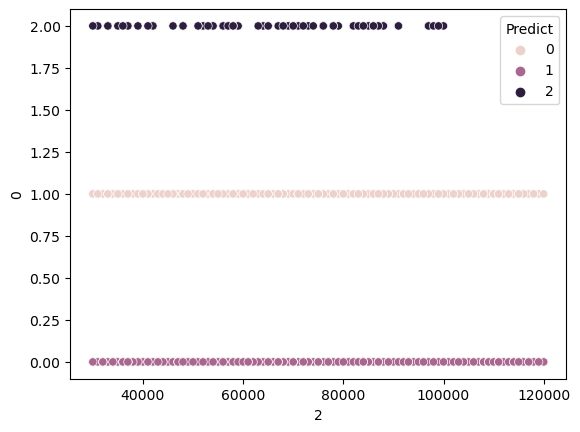

In [17]:
sns.scatterplot(data = df, y = 0, x = 2, hue = "Predict")

In [18]:
df.corr()

,0,1,2,3,4,Predict
0,1.000000,0.137257,0.209319,-0.006763,-0.015167,-0.763926
1,0.137257,1.000000,0.318727,0.001415,-0.003383,-0.137629
2,0.209319,0.318727,1.000000,0.001846,-0.021080,-0.215628
3,-0.006763,0.001415,0.001846,1.000000,-0.007622,0.013154
4,-0.015167,-0.003383,-0.021080,-0.007622,1.000000,0.005214
Predict,-0.763926,-0.137629,-0.215628,0.013154,0.005214,1.000000


In [19]:
var = scaler.inverse_transform(gm.means_)
meansDF = pd.DataFrame(var)
meansDF.head()

,0,1,2,3,4
0,1.0,57.564666,71089.067838,0.523914,1.727184
1,0.0,52.027402,60978.218865,0.522572,1.656947
2,2.0,54.212766,62468.085106,0.553191,1.687943


<AxesSubplot:xlabel='1', ylabel='0'>

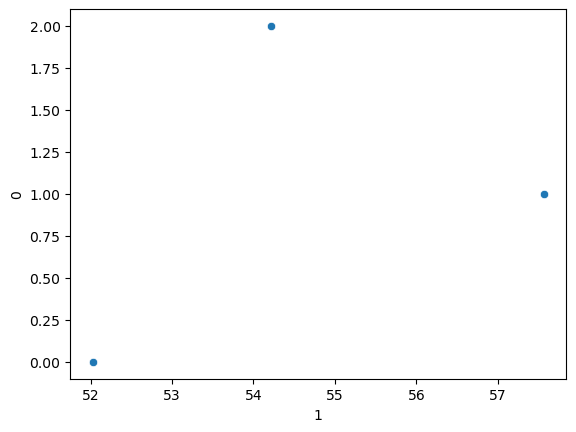

In [20]:
sns.scatterplot(data = meansDF, y = 0, x = 1)